In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style = "whitegrid")
sns.set(color_codes = True)
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

from sklearn import preprocessing

#!pip install missingno
import missingno as msno

import statsmodels.api as sm

from scipy.stats import skew

from multiprocessing import Process

import time 

In [2]:
medicare = pd.read_csv('https://raw.githubusercontent.com/brendan-drew/County-Medicare-Spending/master/data/medicare_county_level/cleaned_medicare_county_all.csv')
mcare = medicare
mcare.head()

,Unnamed: 0,unnamed:_0,state,county,state_and_county_fips_code,beneficiaries_with_part_a_and_part_b,ffs_beneficiaries,ma_beneficiaries,ma_participation_rate,average_age,...,ambulance_per_capita_standardized_costs,ambulance_per_user_standardized_costs,#_ambulance_users,%_of_beneficiaries_using_ambulance,ambulance_events_per_1000_beneficiaries,number_of_acute_hospital_readmissions,hospital_readmission_rate,emergency_department_visits,emergency_department_visits_per_1000_beneficiaries,year
0,2,2,AK,ANCHORAGE,2020,21981.0,21752.0,229.0,1.04,69.0,...,80.40,703.82,2485.0,0.1142,221.0,825.0,0.1639,13419.0,617.0,2007
1,3,3,AK,BETHEL,2050,661.0,661.0,0.0,0.00,71.0,...,850.08,5853.13,96.0,0.1452,454.0,40.0,0.1961,17.0,26.0,2007
2,4,4,AK,BRISTOL BAY,2060,NaN,630.0,NaN,NaN,68.0,...,157.62,1460.27,68.0,0.1079,192.0,20.0,0.1538,312.0,495.0,2007
3,5,5,AK,DENALI,2068,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007
4,6,6,AK,DILLINGHAM,2070,NaN,387.0,NaN,NaN,71.0,...,378.53,3677.59,40.0,0.1029,258.0,17.0,0.1635,41.0,106.0,2007


In [3]:
mcare.shape

(25088, 221)

In [4]:
list(mcare.columns)

['Unnamed: 0',
 'unnamed:_0',
 'state',
 'county',
 'state_and_county_fips_code',
 'beneficiaries_with_part_a_and_part_b',
 'ffs_beneficiaries',
 'ma_beneficiaries',
 'ma_participation_rate',
 'average_age',
 'percent_female',
 'percent_male',
 'percent_non-hispanic_white',
 'percent_african_american',
 'percent_hispanic',
 'percent_other/unknown',
 'percent_eligible_for_medicaid',
 'average_hcc_score',
 'total_actual_costs',
 'total_standardized_costs',
 'total_standardized_risk-adjusted_costs',
 'actual_per_capita_costs',
 'standardized_per_capita_costs',
 'standardized_risk-adjusted_per_capita_costs',
 'ip_actual_costs',
 'ip_actual_costs_as_%_of_total_actual_costs',
 'ip_per_capita_actual_costs',
 'ip_per_user_actual_costs',
 'ip_standardized_costs',
 'ip_standardized_costs_as_%_of_total_standardized_costs',
 'ip_per_capita_standardized_costs',
 'ip_per_user_standardized_costs',
 'ip_users_(with_a_covered_stay)',
 '%_of_beneficiaries_using_ip',
 'ip_covered_stays_per_1000_beneficia

In [5]:
# let's look at the states

In [6]:
len(mcare.state.value_counts())

51

In [7]:
# so we have 51 states, including the Washington DC

In [8]:
len(mcare.county.value_counts())

1846

In [9]:
# and we have 1846 counties

In [10]:
pd.DataFrame(mcare.year.value_counts()).T

,2014,2013,2012,2011,2010,2009,2008,2007
year,3136,3136,3136,3136,3136,3136,3136,3136


In [11]:
# we have data from year 2007 to 2014

In [12]:
pd.DataFrame(mcare.average_age.value_counts()).T

,71.0,70.0,72.0,73.0,69.0,74.0,75.0,68.0,76.0,67.0,66.0,65.0,77.0,64.0,63.0,62.0,78.0
average_age,5402,4417,4388,3030,2552,1916,1210,919,482,331,139,104,83,45,27,6,5


In [13]:
# this gives us ages from age 62 to 78

In [14]:
print('maximum total actual costs: ', max(mcare.total_actual_costs), '\nminimum total actual costs: ', min(mcare.total_actual_costs))

maximum total actual costs:  8135223068.14 
minimum total actual costs:  138189.48


In [15]:
print('maximum actual per capita costs: ', max(mcare.actual_per_capita_costs), '\nminimum actual per capita costs: ', min(mcare.actual_per_capita_costs))

maximum actual per capita costs:  21829.12 
minimum actual per capita costs:  2844.58


In [16]:
print('maximum ambulance_actual_costs costs: ', max(mcare.ambulance_actual_costs), '\nminimum ambulance_actual_costs costs: ', min(mcare.ambulance_actual_costs))

maximum ambulance_actual_costs costs:  144304461.81 
minimum ambulance_actual_costs costs:  0.0


In [17]:
print('maximum hospice_actual_costs costs: ', max(mcare.hospice_actual_costs), '\nminimum hospice_actual_costs costs: ', min(mcare.hospice_actual_costs))

maximum hospice_actual_costs costs:  183902512.63 
minimum hospice_actual_costs costs:  0.0


In [18]:
print('maximum hospital_readmission_rate: ', max(mcare.hospital_readmission_rate), '\nminimum hospital_readmission_rate: ', min(mcare.hospital_readmission_rate))

maximum hospital_readmission_rate:  0.3861 
minimum hospital_readmission_rate:  0.0


In [19]:
mcare1 = mcare[['state', 'county', 'year', 'average_age', 'percent_male', 'percent_female', 
        'percent_eligible_for_medicaid', 'procedures_actual_costs', 
       'total_actual_costs', 'actual_per_capita_costs', 'hospice_actual_costs', 'tests_actual_costs', 
       'imaging_actual_costs', 'dme_actual_costs', 'part_b_drugs_actual_costs', 
       'ambulance_actual_costs', 'hospital_readmission_rate', 'emergency_department_visits']]

mcare1.head()

,state,county,year,average_age,percent_male,percent_female,percent_eligible_for_medicaid,procedures_actual_costs,total_actual_costs,actual_per_capita_costs,hospice_actual_costs,tests_actual_costs,imaging_actual_costs,dme_actual_costs,part_b_drugs_actual_costs,ambulance_actual_costs,hospital_readmission_rate,emergency_department_visits
0,AK,ANCHORAGE,2007,69.0,46.71,53.29,25.23,9948252.37,1.454969e+08,6688.90,2385576.97,3409019.79,5326489.10,3449503.03,4964305.75,1959708.67,0.1639,13419.0
1,AK,BETHEL,2007,71.0,51.13,48.87,59.46,144239.83,4.999320e+06,7563.27,0.00,17129.17,24270.65,51971.34,NaN,604176.46,0.1961,17.0
2,AK,BRISTOL BAY,2007,68.0,50.63,49.37,19.21,253170.41,3.700871e+06,5874.40,NaN,89983.38,108743.88,82758.64,93777.59,111272.17,0.1538,312.0
3,AK,DENALI,2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AK,DILLINGHAM,2007,71.0,51.42,48.58,51.68,123053.76,3.975036e+06,10271.41,NaN,20146.42,31771.02,23715.10,5845.17,156522.44,0.1635,41.0


In [20]:
mcare1.shape

(25088, 18)

In [21]:
# now let's look at missing data

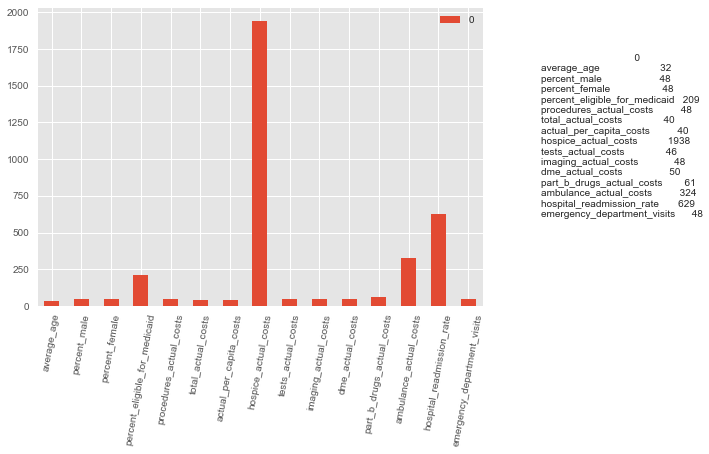

In [22]:
x = pd.DataFrame(mcare1.select_dtypes(exclude = ['object']).isnull().sum())
x[x[0] > 0].plot(kind = 'bar')
plt.figtext(1, .35, x[x[0] > 0])
plt.xticks(rotation = 80)
plt.show()

In [23]:
# there are so many missing values, let's fill them with their mean values

In [24]:
# mcare1 = mcare1.groupby(mcare1.columns, axis = 1).transform(lambda x: x.fillna(x.mean()))
mcare1.iloc[:,2:] = mcare1.iloc[:,2:].apply(lambda x: x.fillna(x.mean()))

In [25]:
mcare1.isna().sum().sum()

0

In [26]:
# so now we don't have any missing values

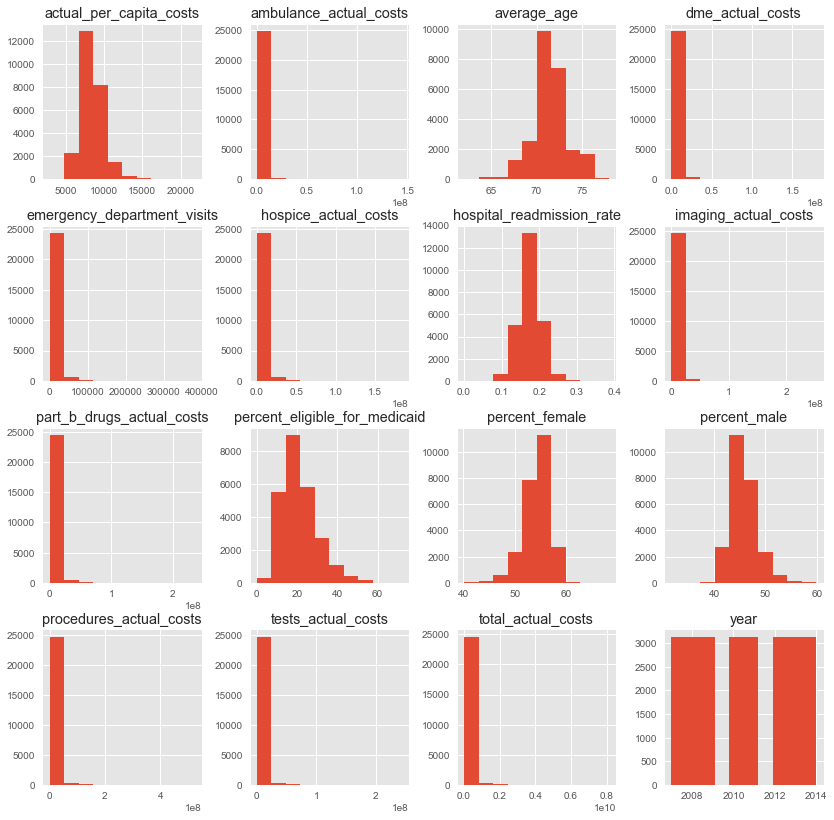

In [27]:
mcare1.drop(['state', 'county'], axis = 1).hist(figsize = (14, 14))
plt.show()

In [28]:
# let's look at the correlation

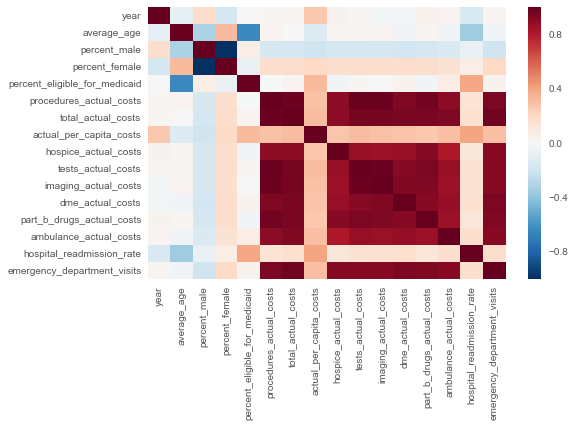

In [29]:
plt.figure(figsize = (8, 5))
sns.heatmap(mcare1.corr())
plt.show()

In [30]:
pd.DataFrame(mcare1.corr()['total_actual_costs'].sort_values(ascending = False)[1:12]).T #top 15 values

,procedures_actual_costs,emergency_department_visits,tests_actual_costs,imaging_actual_costs,dme_actual_costs,part_b_drugs_actual_costs,ambulance_actual_costs,hospice_actual_costs,actual_per_capita_costs,percent_female,hospital_readmission_rate
total_actual_costs,0.977094,0.974236,0.957732,0.954387,0.950725,0.947038,0.936363,0.89484,0.310399,0.176555,0.157652


In [31]:
pd.DataFrame(mcare1.corr()['total_actual_costs'].sort_values(ascending=False)[-5:]).T #last 5 values`

,hospital_readmission_rate,percent_eligible_for_medicaid,year,average_age,percent_male
total_actual_costs,0.157652,0.027625,0.019772,0.003599,-0.176553


In [32]:
# let's look at which are the top states with maximum total spending

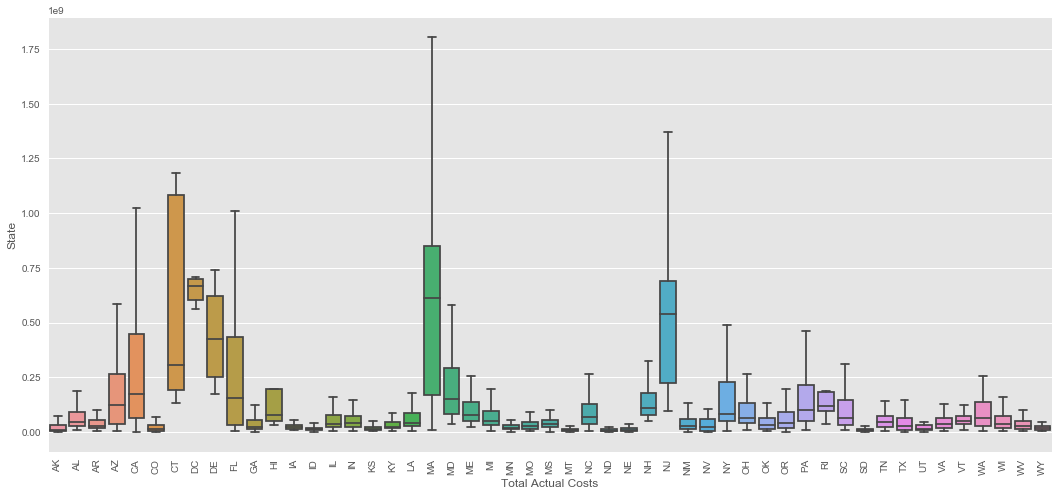

In [33]:
plt.figure(figsize=(18, 8))
sns.boxplot(x = 'state', y = 'total_actual_costs', data = mcare1, showfliers = False)
plt.xlabel('Total Actual Costs')
plt.ylabel('State')
plt.xticks(rotation = 90)
plt.show()

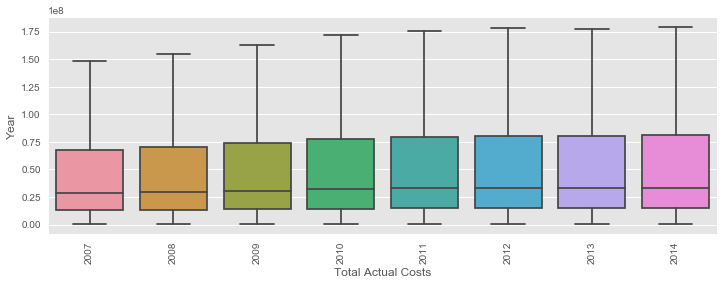

In [34]:
plt.figure(figsize=(12, 4))
sns.boxplot(x = 'year', y = 'total_actual_costs', data = mcare1, showfliers = False)
plt.xlabel('Total Actual Costs')
plt.ylabel('Year')
plt.xticks(rotation = 90)
plt.show()

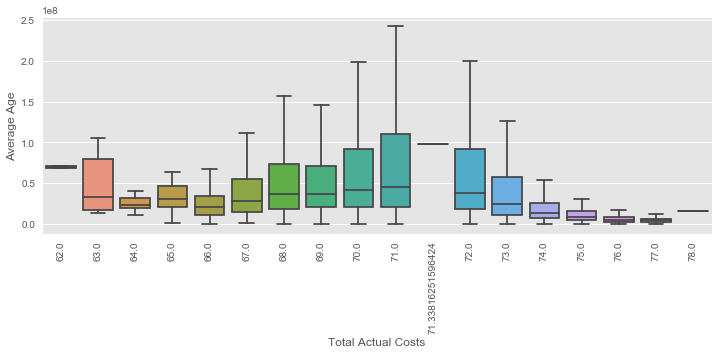

In [35]:
plt.figure(figsize=(12, 4))
sns.boxplot(x = 'average_age', y = 'total_actual_costs', data = mcare1, showfliers = False)
plt.xlabel('Total Actual Costs')
plt.ylabel('Average Age')
plt.xticks(rotation = 90)
plt.show()

In [36]:
def num_density():
    for i in range(0, 6):
        #x.plot.kde() # matplotlib code
        plt.subplot(5, 4, i + 1)
        sns.kdeplot(mcare1.iloc[:,2:4], shade = True, color = "c")   # seaborn code
        #plt.xlabel(x.astype(str).name) # extract name of column from input x
        plt.show()

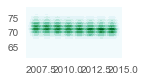

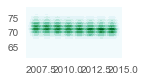

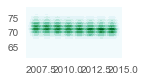

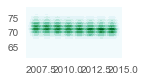

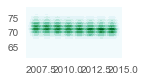

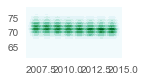

In [37]:
num_density()

In [38]:
for x in mcare1.columns[2:]:
    
    num_density(mcare1[x])

TypeError: num_density() takes 0 positional arguments but 1 was given

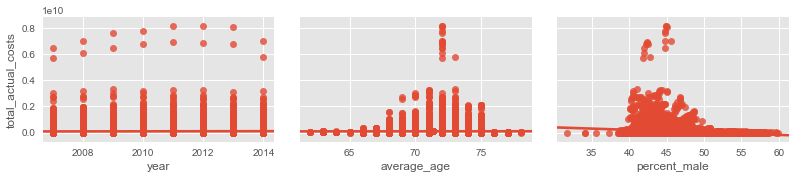

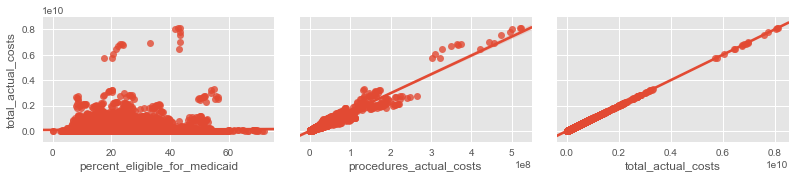

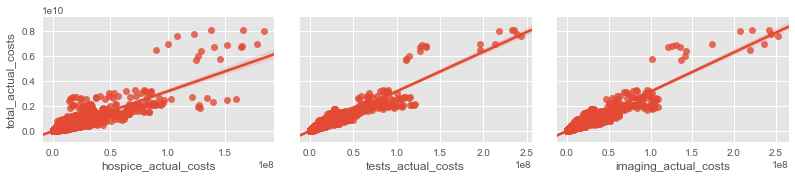

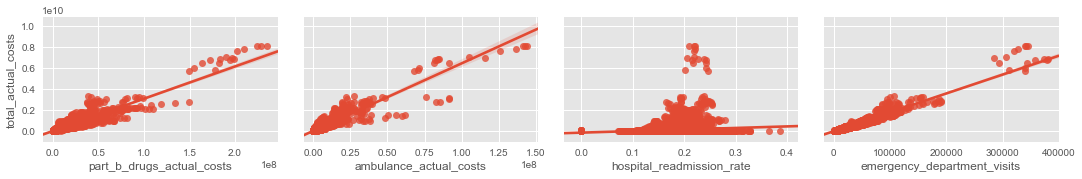

In [39]:
list = ['year', 'average_age', 'percent_male', 'percent_female']

#sns.pairplot(mcare1, x_vars = list[0:], y_vars = ["total_actual_costs"], aspect = 1.5, kind = "reg", palette = "husl")
sns.pairplot(mcare1, x_vars = mcare1.columns[2:5], y_vars = ["total_actual_costs"], aspect = 1.5, kind = "reg", palette = "husl")
sns.pairplot(mcare1, x_vars = mcare1.columns[6:9], y_vars = ["total_actual_costs"], aspect = 1.5, kind = "reg", palette = "husl")
sns.pairplot(mcare1, x_vars = mcare1.columns[10:13], y_vars = ["total_actual_costs"], aspect = 1.5, kind = "reg", palette = "husl")
sns.pairplot(mcare1, x_vars = mcare1.columns[14:], y_vars = ["total_actual_costs"], aspect = 1.5, kind = "reg", palette = "husl")
plt.show()

In [40]:
# also look at the skewness of SalesPrice

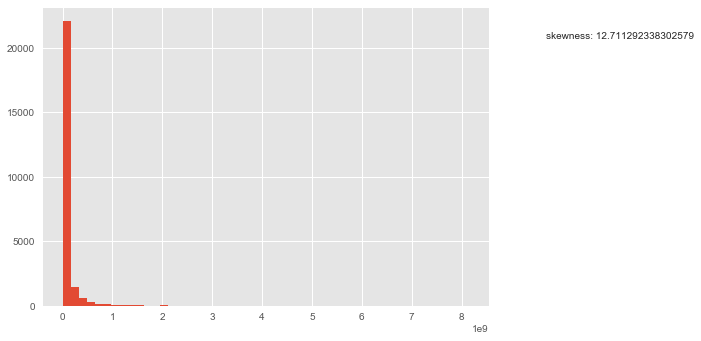

In [41]:
mcare1.total_actual_costs.hist(bins = 50)
plt.figtext(1, .80, 'skewness: ' + str(skew(mcare1.total_actual_costs)))
plt.show()

In [42]:
# it's highly skewed, let's try to unskew that

In [43]:
def unskew(x):
    log = skew(np.log(x))
    sqrt = skew(np.sqrt(x))
    insqrt = skew(1/np.sqrt(x))
    
    print('Log transformation gives ' + str(log) + ' skewness')
    print('Square Root transformation gives ' + str(sqrt) + ' skewness')
    print('Inverse Sq Root transformation gives ' + str(insqrt) + ' skewness')

In [44]:
unskew(mcare1.total_actual_costs)

Log transformation gives 0.18518535624598015 skewness
Square Root transformation gives 3.484756946130576 skewness
Inverse Sq Root transformation gives 3.67227784182846 skewness


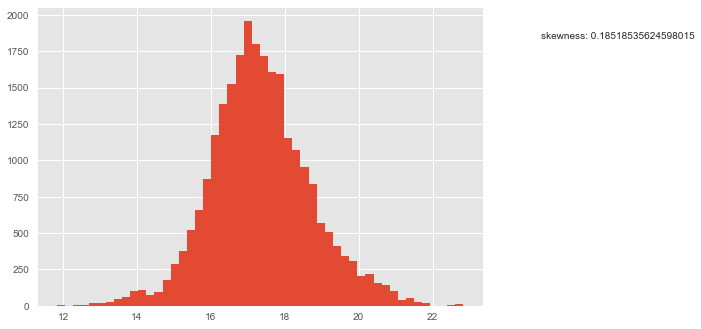

In [45]:
np.log(mcare1.total_actual_costs).hist(bins = 50)
plt.figtext(1, .80, 'skewness: ' + str(skew(np.log(mcare1.total_actual_costs))))
plt.show()

In [ ]:
# we need to change our categorical to dummies for our machine learning

In [ ]:
le = preprocessing.LabelEncoder()
le.fit_transform(mcare1.state)